<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/pandas_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [104]:
pd.read_csv('Pokemon.csv')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [15]:
dataframe = pd.read_csv('Pokemon.csv')
#print(dataframe)

unikatowe_typy = dataframe['Type 1'].unique()
print(unikatowe_typy)
ile_unikatowych_typów = len(unikatowe_typy)
print(f'Ile jest typów pokemonów {ile_unikatowych_typów}')

type_counts= dataframe["Type 1"].value_counts()
print(type_counts)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Ile jest typów pokemonów 18
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


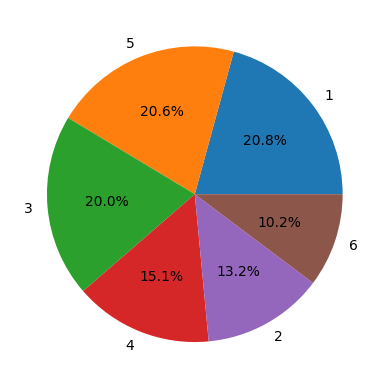

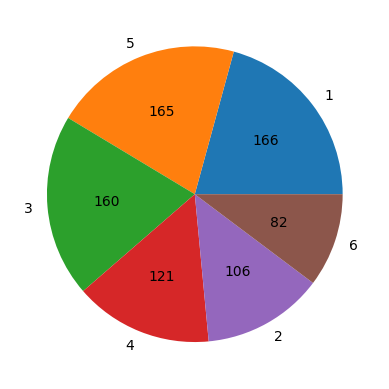

In [63]:
#Policz ile jest pokemonów z danej generacji

generation_counts = dataframe["Generation"].value_counts()
print(generation_counts)

import matplotlib.pyplot as plt
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%')
plt.show()

plt.pie(generation_counts,
        labels=generation_counts.index,
        autopct=lambda pct: f"{int(round(pct/100.*generation_counts.sum()))}")
plt.show()

In [94]:
A = dataframe['Legendary']
B = dataframe[A == True]
C = len(B)

print(C)

65


In [50]:
T2 = dataframe['Type 2']
T2bezType = T2.isnull().sum()
print(T2bezType)

386


In [57]:
Top10 = dataframe['Total'].nlargest(10)
print(Top10)

163    780
164    780
426    780
422    770
424    770
552    720
268    700
409    700
413    700
418    700
Name: Total, dtype: int64


In [73]:
average_hp_by_type = dataframe.groupby('Type 1')['HP'].mean()
print(f'Średnia HP dla typów {average_hp_by_type}')
average_hp = dataframe['HP'].mean()
print(f'Średnia dla HP {average_hp}')

Średnia HP dla typów Type 1
Bug         56.884058
Dark        66.806452
Dragon      83.312500
Electric    59.795455
Fairy       74.117647
Fighting    69.851852
Fire        69.903846
Flying      70.750000
Ghost       64.437500
Grass       67.271429
Ground      73.781250
Ice         72.000000
Normal      77.275510
Poison      67.250000
Psychic     70.631579
Rock        65.363636
Steel       65.222222
Water       72.062500
Name: HP, dtype: float64
Średnia dla HP 69.25875


7) Znajdź wszystkie pokemony, których typ (Type 1) to ogień
8) Wyświetl pokemony z HP większe od 100
9) Wyswietl pokemony z Speed wieksze od 120
10) Wyswietl pokemony które mają atak >100 ORAZ Defence < 50
regresja liniowa

In [96]:
A = dataframe['Type 1']
B = dataframe[A == 'Fire']
C = B['#'].count()
print(C)

#fire_pokemon = dataframe[dataframe['Type 1'] == 'Fire']['#'].count()
#print(fire_pokemon)

52


In [99]:
A = dataframe['HP']
B = dataframe[A > 100]
C = B['#'].count()
print(C)

67


In [101]:
A = dataframe['Speed']
B = dataframe[A > 120]
C = B['#'].count()
print(C)

29


In [103]:
A = dataframe['Attack']
B = dataframe['Defense']
C = dataframe[(A > 100) & (B < 50)]
D = C['#'].count()
print(D)

5
